### Упражнение 1. Списки с одинаковым содержимым

Определите, содержат ли списки $A$ и $B$ из одинаковые наборы элементов.


#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 1<br>1 1 3</font> | <font size=3>True</font> |
| <font size=3>1 3 1<br>1 3 3</font> | <font size=3>False</font> |

In [19]:
import random
alphabet = list(range(5))
N = 20
A = [random.choice(alphabet) for _ in range(N)]
if random.randint(0, 2):
    B = [random.choice(alphabet) for _ in range(N)]
else:
    B = A.copy()
    random.shuffle(B)
    
def equality_check(a, b):
    D = {}
    equality_flag = True
    for item in a:
        if item in D.keys():
            D[item] += 1
        else:
            D[item] = 1
    for item in b:
        if item in D.keys():
            D[item] -= 1
        else:
            equality_flag = False
    for item in D.values():
        if not item == 0:
            equality_flag = False
    return(equality_flag)

print(A)
print(B)
print(equality_check(A, B))

[0, 0, 1, 0, 0, 3, 2, 3, 4, 2, 4, 3, 3, 1, 2, 1, 2, 0, 4, 1]
[1, 1, 4, 2, 2, 0, 4, 3, 2, 2, 0, 1, 3, 3, 0, 0, 3, 0, 4, 1]
True


### Упражнение 2. Наиболее близкие точки

Дан список $A$ различных точек на коорднатной прямой. Распечатайте все пары точек, расстояние между которыми минимально.

In [22]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

def pair_search(a):
    output = []
    treashold = 100
    for i in range(len(a)):
        for j in range (i+1, len(a)):
            if abs(a[i] - a[j]) < treashold:
                output.clear()
                output.append([a[i], a[j]])
                treashold = abs(a[i] - a[j])
            elif abs(a[i] - a[j]) == treashold:
                output.append([a[i], a[j]])
    return(output)

print(pair_search(A))

[47, 9, 8, 96, 54, 23, 32, 70, 67, 95, 89, 12, 85, 7, 44, 45, 94]
[[9, 8], [8, 7], [96, 95], [95, 94], [44, 45]]


### Упражнение 3. Треугольники

Заданы $N$ попарно разлиных длин отрезков. Вычислить количество способов, которыми из этих отрезков можно сложить треугольник. Возможно ли, чтобы алгоритм работал с эффективностью $O(N^2)$?

In [40]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

# В худшем случае будет N^3 треугольников, поэтому нельзя.

def simple_triangle_counter(a):
    counter = 0
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            for k in range(j+1, len(a)):
                if a[i]+a[j] > a[k] and \
                   a[j]+a[k] > a[i] and \
                   a[k]+a[i] > a[j]:
                    counter += 1
    return(counter)

# Можно улучшить этот алгоритм для хороших случаев.
# Вместо .sort() можно поставить любую из функций лабы alg1.

def better_triangle_counter(a):
    counter = 0
    a.sort()
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            k = j+1
            while k < len(a) and a[i]+a[j] > a[k]:
                counter += 1
                k+=1
    return(counter)

print(A)
print(sorted(A))
print(simple_triangle_counter(A))
print(better_triangle_counter(A))


[82, 52, 34, 38, 46, 62, 79, 93, 56, 3]
[3, 34, 38, 46, 52, 56, 62, 79, 82, 93]
75
75


### Упражнение 4. Сортировка расческой

Напишите функцию, сортирующую функцию с помощью алгоритма сортировки [расческой](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%80%D0%B0%D1%81%D1%87%D1%91%D1%81%D0%BA%D0%BE%D0%B9)

In [42]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

def comb_sort(a):
    shrink = 1.247
    is_sorted = False
    gap = len(a)
    while is_sorted == False:
        gap = int(gap/shrink)
        if gap <= 1:
            gap = 1
            is_sorted = True
        for i in range(len(a) - gap):
            if a[i] > a[i+gap]:
                a[i], a[i+gap] = a[i+gap], a[i]
                is_sorted = False
    return(a)

print(A)
print(comb_sort(A))

[87, 24, 62, 52, 68, 38, 22, 11, 83, 43, 77, 15, 55, 40, 29]
[11, 15, 22, 24, 29, 38, 40, 43, 52, 55, 62, 68, 77, 83, 87]


### Упражнение 5. Сортировка Шелла

Напишите функцию, сортирующую список с помощью алгоритма сортировки [Шелла](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A8%D0%B5%D0%BB%D0%BB%D0%B0). Добавьте возможность изменения длины промежутка согласно последовательностям Седжвика и Пратта.

In [43]:
import random
N = random.randint(10, 20)
A = random.sample(range(100), N)

def shell_sort(a):
    gap = len(a) // 2
    while gap > 0:
        for i in range(gap, len(a)):
            j = i
            while j >= gap and a[j - gap] > a[i]:
                j -= gap
            a[i], a[j] = a[j], a[i]
        gap = gap // 2
    return(a)

print(A)
print(shell_sort(A))

[1, 69, 31, 6, 74, 58, 50, 16, 39, 23]
[1, 6, 16, 23, 31, 39, 50, 58, 69, 74]


### Упражнение 6. Экспериментальая оценка временной сложности алгоритма

Проверьте, верны ли для реализованных Вами алгоритмов их теоретические временные сложности. Исследуйте сортировки выбором, пузырьком, вставками, расческой. Исследуйте сортировку Шелла в вариантах с последовательностями Седжвика, Пратта и в оригинальном варианте с делением длины промежутка пополам.

Для того чтобы убедиться в том, что тестируемая сложность $O(f(N))$ подходит, надо изучить зависимость отношения $\frac{T(N)}{f(N)}$ от $N$. Если $\displaystyle\lim_{N\to \infty}\frac{T(N)}{f(N)} = С$, где $C > 0$, то сложность алгоритма не превосходит $O(f(N))$. Если $C > 0$, то сложность алгоритма - $O(f(N))$.

Для квадратичных сортировок брать значения $N$, превышающие $10^5$ не следует, так как сортировка будет занимать слишком много времени. У меня сортировка пузырьком списка, состоящего из $10^5$ целых чисел заняла почти 15 мин.

Для измерения времени сортировки используйте модуль [`timeit`](https://docs.python.org/3/library/timeit.html). Аргумент `stmt` функции `timeit.timeit()` содержит код, выполняемый `number` раз, после чего вычисляется среднее время его выполнения. Аргумент `setup` содержит код, который выполняется **1** раз до повторных запусков `stmt`. С помощью аргумента `globals` в `timeit.timeit()` передаются имена, необходимые для успешного выполнения `stmt` и `setup`. 

Обратите внимание, что в `stmt` инициализируется список `a`. Если этого не делать, то начиная со второго повторения `a` будет упорядочен до сортировки.

Ниже приведен пример измерения времени сортировки с помощью метода `list.sort()`. Встроенная сортировка Python использует алгоритм [timsort](https://ru.wikipedia.org/wiki/Timsort), который сочетает в себе сортировки вставками и слиянием. Теоретическая сложность алгоритма $O(N \cdot \log N)$, однако у меня получилось, что сложность алгоритма ближе к $O(N \cdot \log ^2 N)$

### Экспериментальая оценка временной сложности сортировки выбором

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done


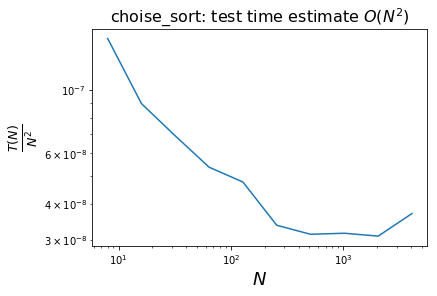

In [5]:
# Здесь тестируем choise_sort
# Вроде совпадает с теоритической оценкой, но  
# брал мало num_points - уж очень долго считает

import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 12
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)

def choise_sort(a):
    for i in range(len(a)):
        index_min = i
        a_min = a[i]
        for j in range(i, len(a)):
            if a[j] < a_min:
                a_min = a[j]
                index_min = j
        a[i], a[index_min] = a[index_min], a[i]  
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];choise_sort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, n2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N^2}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('choise_sort: test time estimate $O(N^2)$', fontsize=16)
plt.show()


### Экспериментальая оценка временной сложности сортировки пузырьком

8 length done
16 length done
32 length done
64 length done
128 length done
256 length done
512 length done
1024 length done
2048 length done
4096 length done
8192 length done
16384 length done


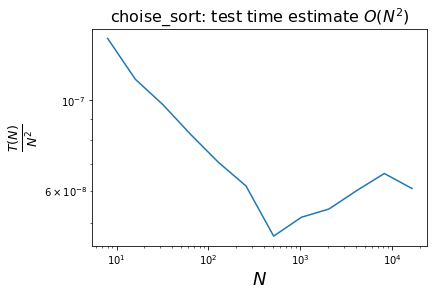

In [7]:
# Здесь тестируем bubble_sort
# Тоже вроде совпадает с теоритической оценкой

import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 12
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
n2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)

def bubble_sort(a):
    for i in range(len(a)):
        for j in range(len(a) - 1 - i):
            if a[i] > a[i+1]:
                a[i], a[i+1] = a[i+1], a[i]
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];bubble_sort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T / (N ** 2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, n2_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N^2}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('choise_sort: test time estimate $O(N^2)$', fontsize=16)
plt.show()


### Экспериментальая оценка временной сложности сортировки вставками

In [8]:


import timeit
import math
import matplotlib.pyplot as plt
start = 8
factor = 2
num_points = 15
num_repeats = 10
N_min = start
N_max = start * factor**(num_points - 1)
N_list = []
T_list = []
nlogn_list = []
nlogn2_list = []
N = N_min
setup = """
import random
L=list(range(N))
random.shuffle(L)
def comb_sort(a):
    shrink = 1.247
    is_sorted = False
    gap = len(a)
    while is_sorted == False:
        gap = int(gap/shrink)
        if gap <= 1:
            gap = 1
            is_sorted = True
        for i in range(len(a) - gap):
            if a[i] > a[i+gap]:
                a[i], a[i+gap] = a[i+gap], a[i]
                is_sorted = False
    return(a)
"""
while N <= N_max:
    T = timeit.timeit(
        stmt="a = L[:];comb_sort(a)",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T_copy = timeit.timeit(
        stmt="a = L[:]",
        setup=setup,
        number=num_repeats,
        globals=dict(N=N)
    )
    T -= T_copy
    T /= num_repeats
    N_list.append(N)
    T_list.append(T)
    n2_list.append(T * log/ (N **2))
    print("{} length done".format(N))
    N *= factor
    
plt.plot(N_list, nlogn_list)
plt.xlabel(r"${N}$", fontsize=18)
plt.ylabel(r"$\frac{T(N)}{N ^2}$", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.title('timsort: test time estimate $O(N ^2)$', fontsize=16)
plt.show()

NameError: name 'log' is not defined

### Экспериментальая оценка временной сложности сортировки расческой

### Экспериментальая оценка временной сложности сортировки Шелла с делением отрезка пополам

### Упражнение 7. Слияние

В двух файлах <font color=green>seq1.txt</font>, <font color=green>seq2.txt</font> записаны возрастающие последовательности целых чисел. Объедините эти последовательности в одну возрастающую последовательность и запишите ее в третий файл. Постарайтесь сделать алгоритм однопроходным.

#### Пример

| <font size=3>Входные последовательности</font> | <font size=3>Выходная последовательность</font> |
| :---: | :---: |
| <font size=3>1 3 5 7<br>2 3 4 5 6</font> | <font size=3>1 2 3 3 4 5 5 6 7</font> |

In [ ]:
with open('seq1.txt', 'r') as f:
    input_str = f.read()
    seq1 = list(map(int, input_str.split()))
    print(seq1)

with open('seq2.txt', 'r') as f:
    input_str = f.read()
    seq2 = list(map(int, input_str.split()))
    print(seq2)

def merge(input_seq1, input_seq2):
    i, j = 0, 0
    output_list = []
    output_string = ""
    while i < len(input_seq1) or j < len(input_seq2):
        if i < len(input_seq1):
            if j == len(input_seq2) or input_seq1[i] <= input_seq2[j]:
                output_list.append(input_seq1[i])
                i += 1
        if j < len(input_seq2):
            if i == len(input_seq1) or input_seq1[i] > input_seq2[j]:
                output_list.append(input_seq2[j])
                j += 1
    for i in range(len(output_list)):
        output_string += str(output_list[i])
        if not i == len(output_list) - 1: output_string += " "
    with open('seq3.txt', 'w') as f:
        f.write(output_string)

merge(seq1, seq2)